In [1]:
import os

from guide_fns import *

### Create Environment (Edit only this cell):

### Save Environment:

In [2]:
env_path = "/home/jayaram/research/research_tracks/table_top_rearragement/test_diffusion_planning/generate_traj_maze2d/5x5"
if not os.path.exists(env_path):
    os.mkdir(env_path)

# np.save(env_path + "maze500.npy", env)

In [3]:
def convert_maze_to_image(generated_maze, image_width, image_height):

    maze_width = generated_maze.shape[1]
    maze_height = generated_maze.shape[0]
    
    cell_width = image_width // maze_width
    cell_height = image_height // maze_height

    pad_width_left = (image_width % maze_width) // 2
    pad_width_right = pad_width_left + ((image_width % maze_width) % 2)
    pad_length_up = (image_height % maze_height) // 2
    pad_length_down = pad_length_up + ((image_height % maze_height) % 2)

    maze_image = np.zeros((image_height - (pad_length_up + pad_length_down), image_width - (pad_width_left + pad_width_right)), dtype = np.uint8)

    for row in range(maze_height):
        for col in range(maze_width):

            if generated_maze[row, col] == 1:
                maze_image[row * cell_height : (row+1) * cell_height, col * cell_width : (col+1) * cell_width] = 255
            elif generated_maze[row, col] == 0:
                maze_image[row * cell_height : (row+1) * cell_height, col * cell_width : (col+1) * cell_width] = 0

    maze_image = np.pad(maze_image, ((pad_length_up, pad_length_down), (pad_width_left, pad_width_right)), 'edge')

    return maze_image.copy()

#load env
file_num = 500
envfile = "/home/jayaram/research/research_tracks/table_top_rearragement/test_diffusion_planning/generate_traj_maze2d/5x5/maze" + str(file_num) + ".npy"

data = np.load(envfile)
            # h ,w = data.shape[0], data.shape[1]
w , h = 1024, 1024
num_waypoints = 256
img = convert_maze_to_image(data, w, h)

### Calculate and Display Cost Map:

(5, 5)


/home/jayaram/research/research_tracks/table_top_rearragement/test_diffusion_planning/test_guided_diffusion/guide_fns.py:51: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1678402379298/work/torch/csrc/utils/tensor_new.cpp:245.)
  scharr_0 = torch.tensor([[scharr_0]], dtype = torch.float32)


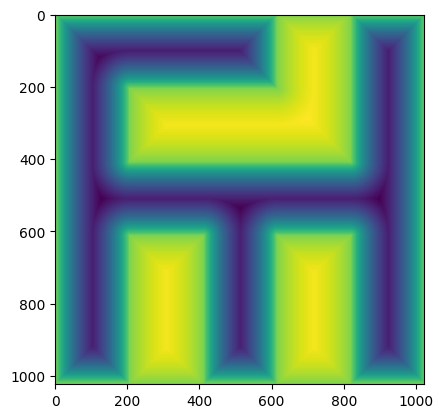

In [4]:
print(data.shape)
gradient_map, cost_map = get_gradient_map(img)

cost_image = np.rot90(cost_map)
plt.imshow(cost_image, interpolation = 'nearest')

### Save Gradient and Cost Map

In [5]:
env_path = ""
np.save(env_path + "cost_map.npy", cost_map)
np.save(env_path + "gradient_map.npy", gradient_map)

print(cost_map.shape)
print(gradient_map.shape)

(1024, 1024)
(1024, 1024, 2)


# -----------------------------------------------------------------------------

### Load and Display environments:

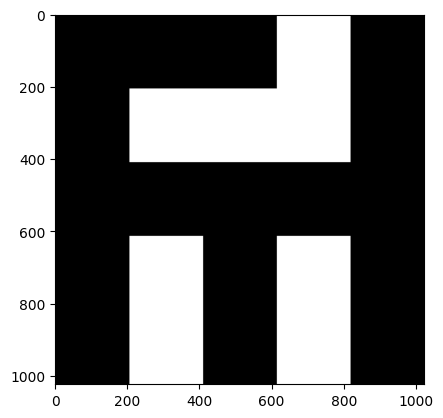

In [6]:
plot_environment(img)

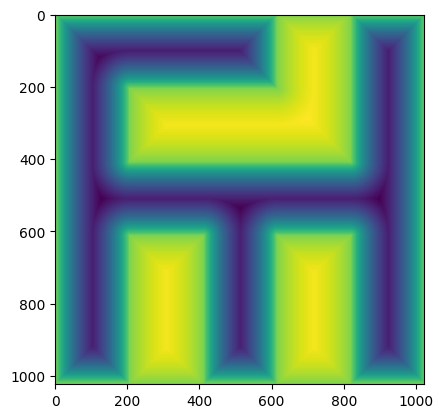

In [7]:
cost_image = np.rot90(cost_map)
# cost_image = cost_map
plt.imshow(cost_image, interpolation = 'nearest')

### Plot start and goal on environment:

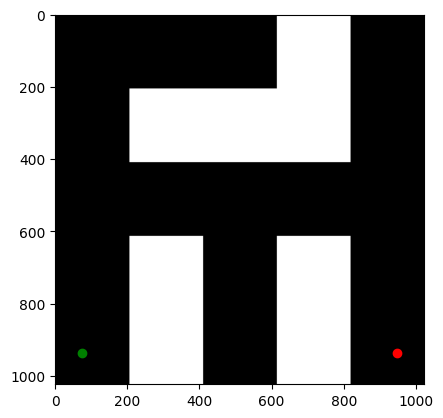

In [17]:
# env_name = "two_pillars"
# env_path = "environments/2D/" + env_name + "/"

# env = np.load(env_path + "env.npy")

start = [-0.85 ,  -0.83]
goal =  [0.85 ,  -0.83]

start_pixel= guide_point_to_pixel(np.array(start).reshape((1, 2, 1)), img.shape)
goal_pixel = guide_point_to_pixel(np.array(goal).reshape((1, 2, 1)), img.shape)
[]
plot_environment(img)
plt.scatter(start_pixel[:, 0, :], 1024 - 1 - start_pixel[:, 1, :], color = 'green')
plt.scatter(goal_pixel[:, 0, :], 1024 - 1 - goal_pixel[:, 1, :], color = 'red')